In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')
df.head()

,training_iteration,episode_reward_max,five_min,te,s,thirty_min,ten_min_1,www,rand_min,Unnamed: 9,Unnamed: 10,ten_min
0,1,-8.910303,-9.641892,-8.755515,-8.755515,-10.692364,-8.035549,-9.690000,9.022223,-2253.827637,211.207267,-12.271840
1,2,-8.910303,-8.696023,-9.601659,-9.601659,-8.836245,-8.812115,-8.070826,-8.347978,-1579.804077,NaN,-8.601857
2,3,-7.972516,-8.492938,-9.473659,-9.473659,-8.836245,-8.694640,-8.070826,-8.347978,-1431.130493,NaN,-7.792346
3,4,-7.972516,-8.492938,-9.473659,-9.473659,-8.836245,-8.694640,-8.216940,-8.499110,-1507.846680,NaN,-8.210057
4,5,-8.394205,-8.492938,-9.149248,-9.149248,-8.810157,-8.396905,-8.141699,-8.421285,-1408.173950,NaN,-7.667350


In [3]:
df.reset_index(level=0, inplace =True)
print(df.head())

   index  training_iteration  episode_reward_max  five_min        te  \
0      0                   1           -8.910303 -9.641892 -8.755515   
1      1                   2           -8.910303 -8.696023 -9.601659   
2      2                   3           -7.972516 -8.492938 -9.473659   
3      3                   4           -7.972516 -8.492938 -9.473659   
4      4                   5           -8.394205 -8.492938 -9.149248   

          s  thirty_min  ten_min_1       www  rand_min   Unnamed: 9  \
0 -8.755515  -10.692364  -8.035549 -9.690000  9.022223 -2253.827637   
1 -9.601659   -8.836245  -8.812115 -8.070826 -8.347978 -1579.804077   
2 -9.473659   -8.836245  -8.694640 -8.070826 -8.347978 -1431.130493   
3 -9.473659   -8.836245  -8.694640 -8.216940 -8.499110 -1507.846680   
4 -9.149248   -8.810157  -8.396905 -8.141699 -8.421285 -1408.173950   

   Unnamed: 10    ten_min  
0   211.207267 -12.271840  
1          NaN  -8.601857  
2          NaN  -7.792346  
3          NaN  -8.210057  


In [4]:
roll_ave = df.episode_reward_max.rolling(window=75).mean()

In [5]:
# load libraries and set plot parameters
# import numpy as np
import matplotlib

# plt.rcParams['text.usetex'] = True

label_size = 8
font_size = 8
legend_size = 8

def ticks_size():
    """Size of axes' ticks
    """
    return 8


def axis_lw():
    """Line width of the axes
    """
    return 0.6


def plot_lw():
    """Line width of the plotted curves
    """
    return 0.5


params = {'savefig.dpi': 600,
#               'text.usetex': True,
              'figure.dpi': 600,
              'figure.figsize': [4.667, 3.5],
              'font.size': font_size,
              'axes.labelsize': label_size,
              'axes.titlesize': font_size,
              'axes.linewidth': axis_lw(),
#               'text.fontsize': font_size,
              'xtick.labelsize': ticks_size(),
              'ytick.labelsize': ticks_size(),
              'font.family': 'serif',
              'legend.fontsize': legend_size,
              'lines.markersize': 8,
         'grid.linewidth': 0.2,
         'grid.linestyle': '--',
         'legend.framealpha': 1,
         'legend.frameon': True}

matplotlib.rcParams.update(params)

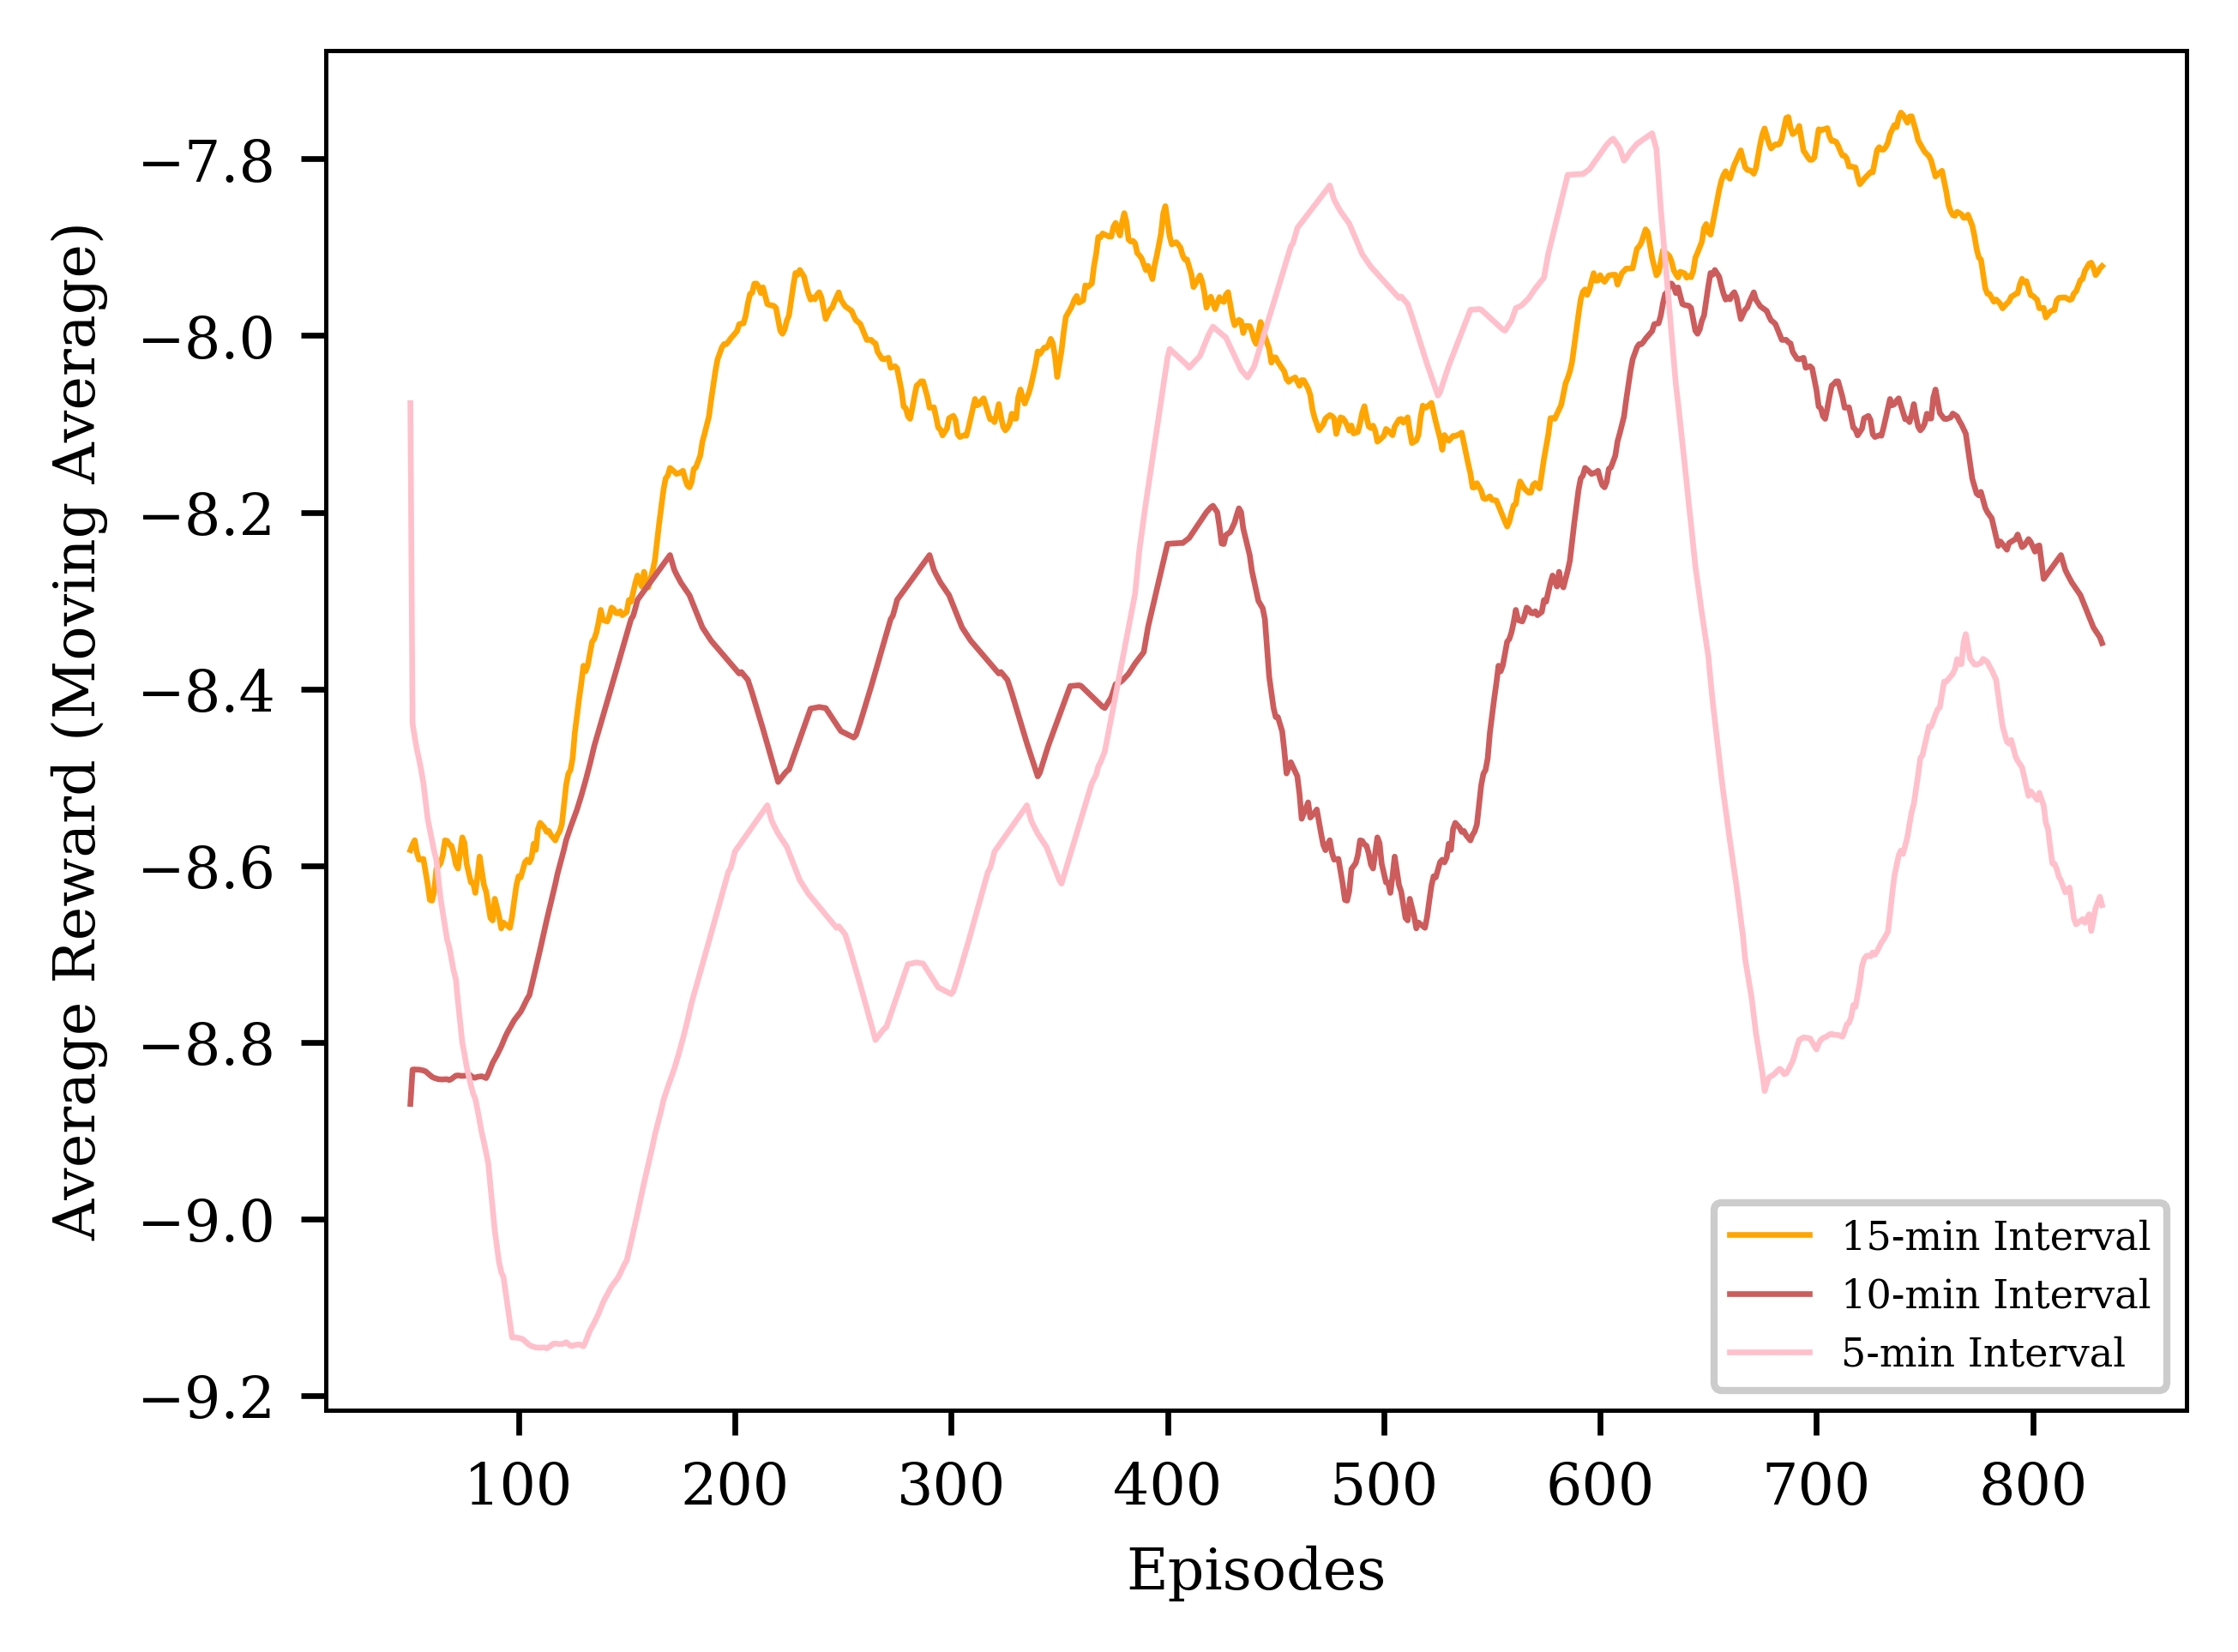

In [6]:
roll_ave = df.episode_reward_max.rolling(window=50).mean()
roll_ave_five = df.five_min.rolling(window=50).mean()
roll_ave_ten = df.ten_min.rolling(window=50).mean()
roll_ave_thirty = df.thirty_min.rolling(window=50).mean()
roll_ave_fivers = df.rand_min.rolling(window=50).mean()
roll_ave2=df.episode_reward_max.rolling(window=50).mean()
exp1 = df.episode_reward_max.ewm(span=75,adjust=False).mean()
am = -9.75
pm=-9.55
nn=-7.72

fig = plt.figure(figsize=(4.667,3.5))
ax= plt.axes()


#plt.plot(df.training_iteration,df.episode_reward_max, label='Deep RL Training Curve',color='0.1',linewidth='0.5')
#plt.plot(df.training_iteration,df.five_min, label='5-min Training Curve',color='0.5',linewidth='0.5')
plt.plot(df.training_iteration,roll_ave, label='15-min Interval',color='orange',linewidth='0.8')
#plt.plot(df.training_iteration,roll_ave_five, label='30-min Interval',color='green',linewidth='1')
#plt.plot(df.training_iteration,exp1, label='EMA(100)',color='green')


#plt.plot(df.training_iteration,df.ten_min, label='10-min Training Curve',color='0.5',linewidth='0.5')
#plt.plot(df.training_iteration,roll_ave_ten, label='45-min Interval',color='blue',linewidth='1')

#plt.plot(df.training_iteration,df.ten_min, label='30-min Training Curve',color='0.5',linewidth='0.5')
plt.plot(df.training_iteration,roll_ave_thirty, label='10-min Interval',color='indianred',linewidth='0.8')

plt.plot(df.training_iteration,roll_ave_fivers, label='5-min Interval',color='pink',linewidth='0.8')

plt.ylabel('Average Reward (Moving Average)')
plt.xlabel('Episodes')
#plt.axhline(y=am, color='darkorange', linestyle='--', label='AM - SYNCHRO',linewidth='0.55')
#plt.axhspan(ymin=-9.58,ymax=-9.92,alpha =0.1,color='darkorange')
#plt.axhline(y=pm, color='blue', linestyle='--', label='PM - SYNCHRO',linewidth='0.55')
#plt.axhspan(ymin=-9.35,ymax=-9.75,alpha =0.1,color='blue')
#plt.axhline(y=nn, color='green', linestyle='--', label='NN - SYNCHRO',linewidth='0.55')
#plt.axhspan(ymin=-7.48,ymax=-7.96,alpha =0.1,color='green')
plt.rcParams["font.family"] = "serif"
plt.legend(loc='lower right',fontsize='x-small')

fig.savefig(fname='newplot_short.pdf',bbox_inches='tight')

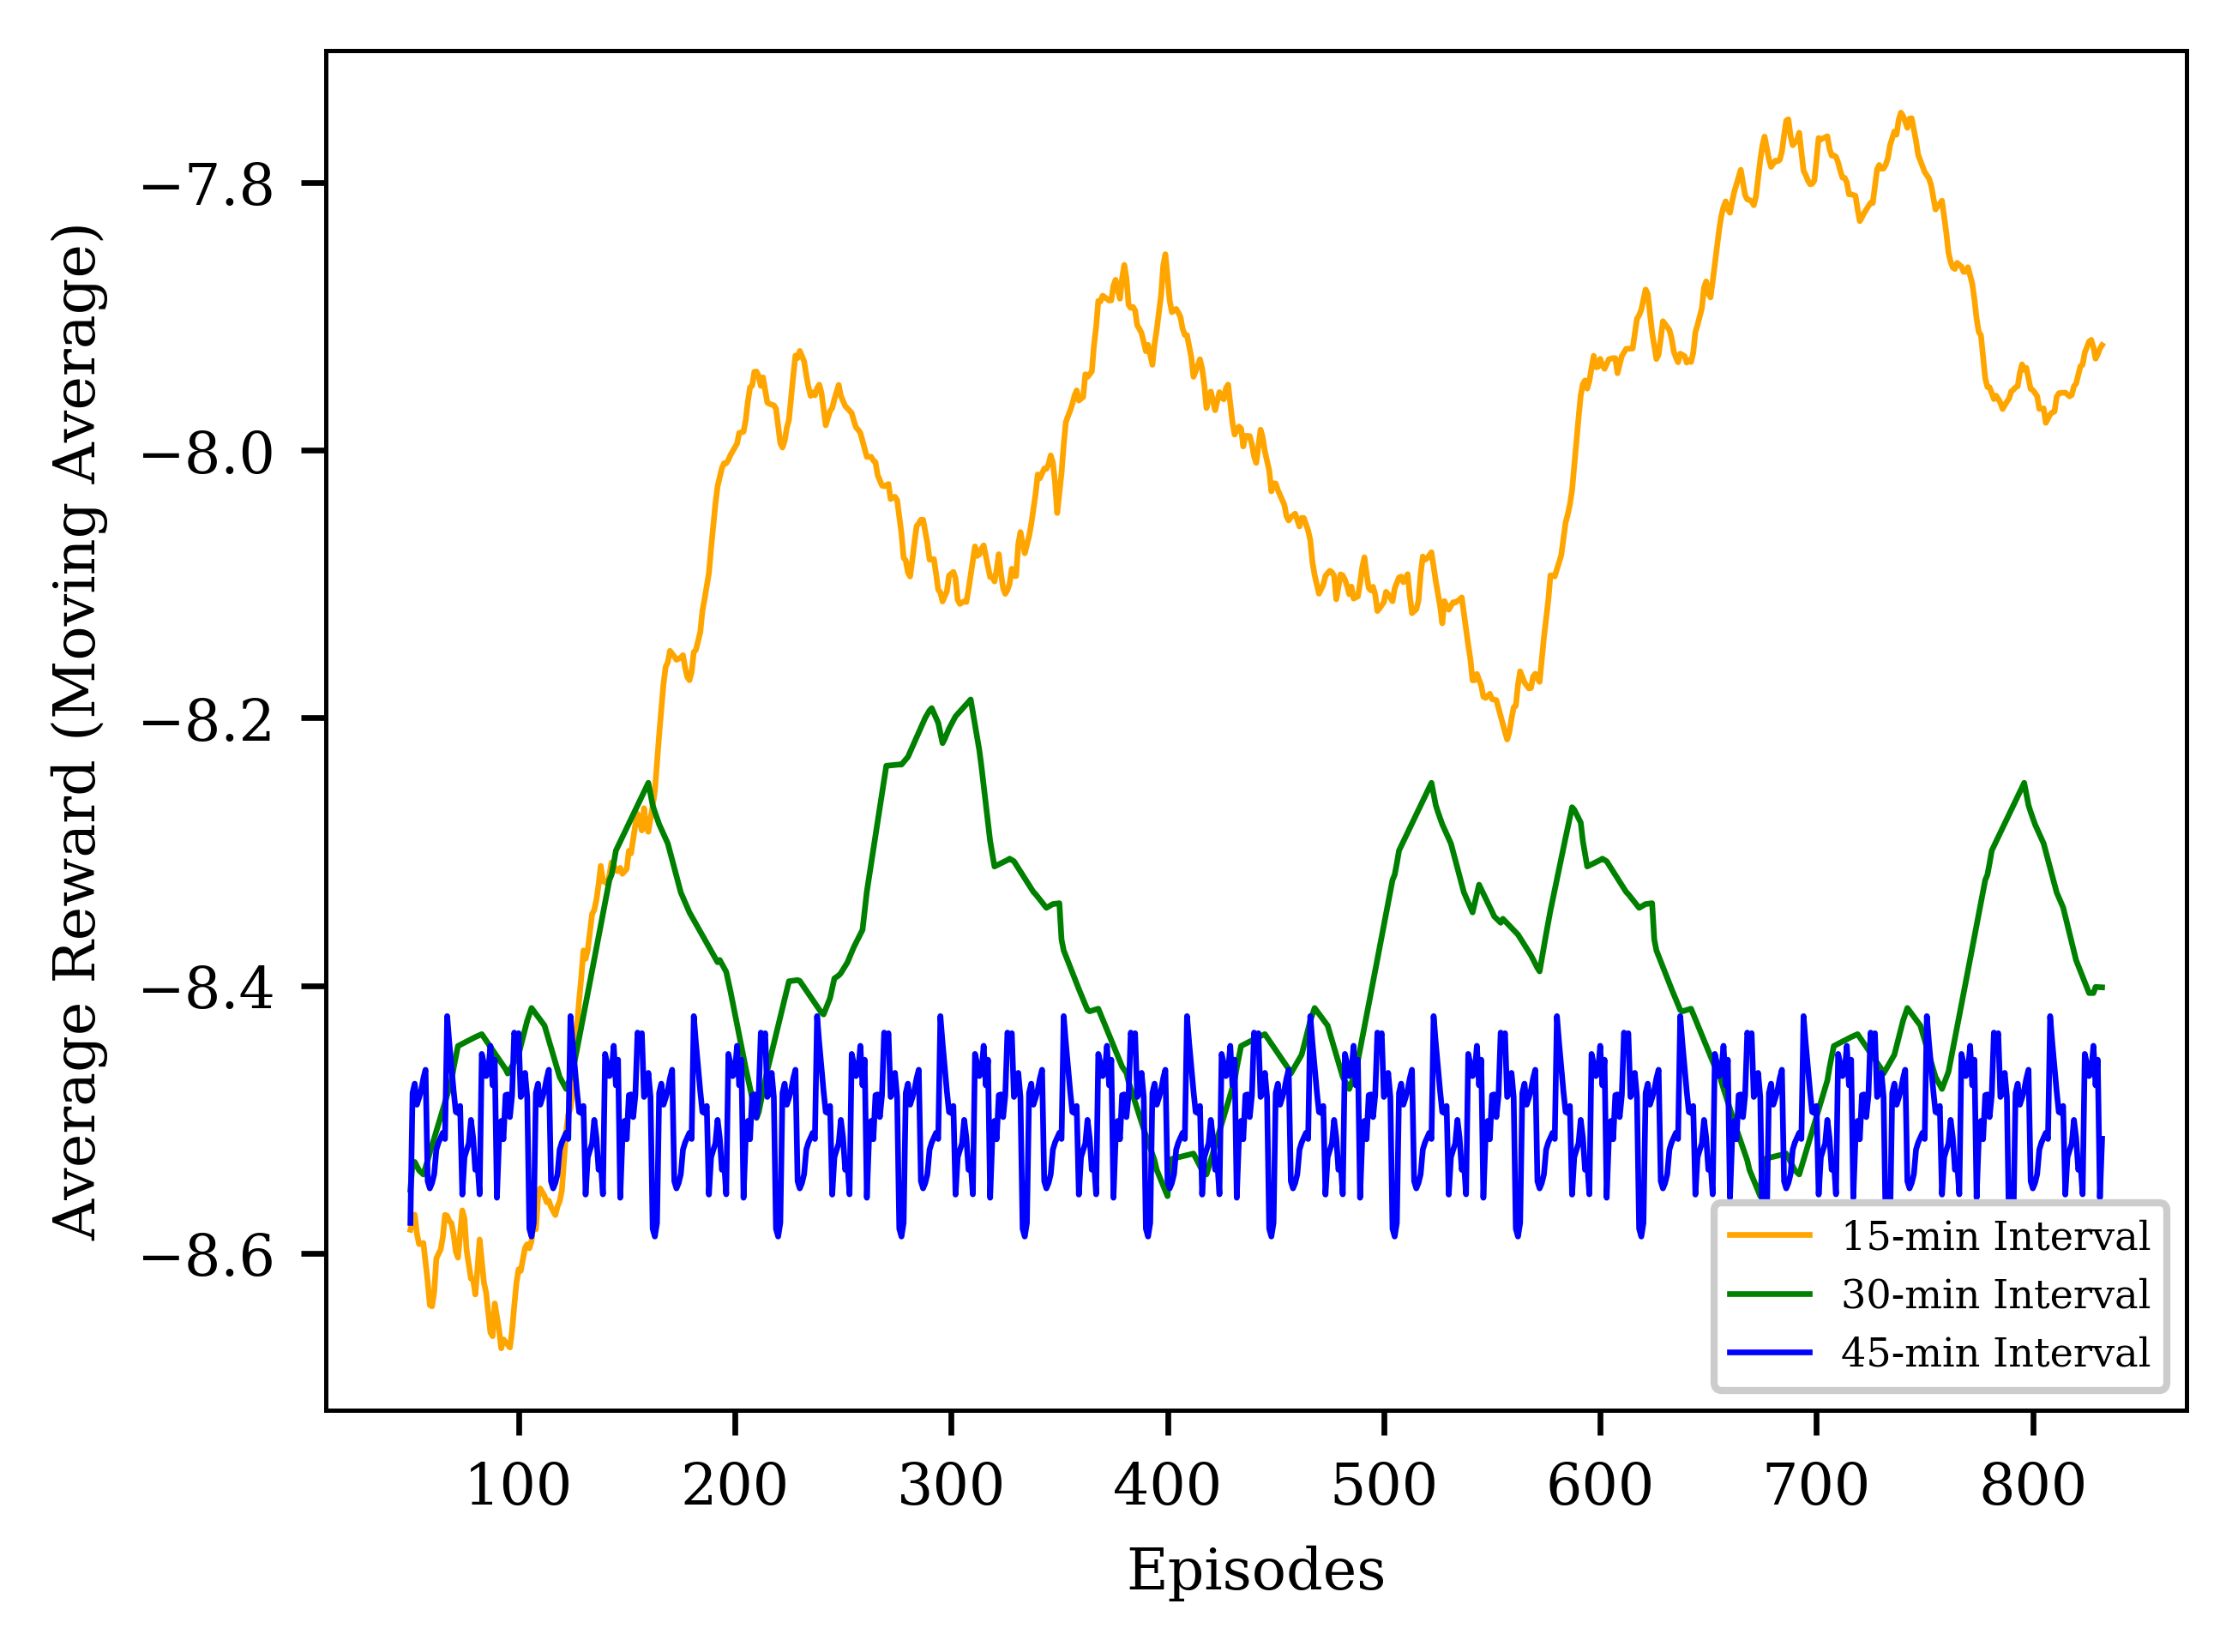

In [7]:
roll_ave = df.episode_reward_max.rolling(window=50).mean()
roll_ave_five = df.five_min.rolling(window=50).mean()
roll_ave_ten = df.ten_min.rolling(window=50).mean()
roll_ave_thirty = df.thirty_min.rolling(window=50).mean()
roll_ave_fivers = df.rand_min.rolling(window=50).mean()
roll_ave2=df.episode_reward_max.rolling(window=50).mean()
exp1 = df.episode_reward_max.ewm(span=75,adjust=False).mean()
am = -9.75
pm=-9.55
nn=-7.72

fig = plt.figure(figsize=(4.667,3.5))
ax= plt.axes()


#plt.plot(df.training_iteration,df.episode_reward_max, label='Deep RL Training Curve',color='0.1',linewidth='0.5')
#plt.plot(df.training_iteration,df.five_min, label='5-min Training Curve',color='0.5',linewidth='0.5')
plt.plot(df.training_iteration,roll_ave, label='15-min Interval',color='orange',linewidth='0.8')
plt.plot(df.training_iteration,roll_ave_five, label='30-min Interval',color='green',linewidth='0.8')
#plt.plot(df.training_iteration,exp1, label='EMA(100)',color='green')


#plt.plot(df.training_iteration,df.ten_min, label='10-min Training Curve',color='0.5',linewidth='0.5')
plt.plot(df.training_iteration,roll_ave_ten, label='45-min Interval',color='blue',linewidth='0.8')

#plt.plot(df.training_iteration,df.ten_min, label='30-min Training Curve',color='0.5',linewidth='0.8')
#plt.plot(df.training_iteration,roll_ave_thirty, label='10-min Interval',color='indianred',linewidth='1')

#plt.plot(df.training_iteration,roll_ave_fivers, label='5-min Interval',color='pink',linewidth='1')

plt.ylabel('Average Reward (Moving Average)')
plt.xlabel('Episodes')
#plt.axhline(y=am, color='darkorange', linestyle='--', label='AM - SYNCHRO',linewidth='0.55')
#plt.axhspan(ymin=-9.58,ymax=-9.92,alpha =0.1,color='darkorange')
#plt.axhline(y=pm, color='blue', linestyle='--', label='PM - SYNCHRO',linewidth='0.55')
#plt.axhspan(ymin=-9.35,ymax=-9.75,alpha =0.1,color='blue')
#plt.axhline(y=nn, color='green', linestyle='--', label='NN - SYNCHRO',linewidth='0.55')
#plt.axhspan(ymin=-7.48,ymax=-7.96,alpha =0.1,color='green')
plt.rcParams["font.family"] = "serif"
plt.legend(loc='lower right',fontsize='x-small')

fig.savefig(fname='newplot_longer.pdf',bbox_inches='tight')

In [8]:
!pip install sdgym

     |████████████████████████████████| 51kB 703kB/s eta 0:00:01
     |████████████████████████████████| 92kB 1.1MB/s eta 0:00:01
     |████████████████████████████████| 143kB 1.6MB/s eta 0:00:01
     |████████████████████████████████| 9.5MB 2.4MB/s eta 0:00:01
     |████████████████████████████████| 81kB 3.2MB/s eta 0:00:011
     |████████████████████████████████| 12.5MB 3.2MB/s eta 0:00:01
     |████████████████████████████████| 133kB 2.7MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/ca/80/7c0cad11bd99985cfe7c09427ee0b4f9bd6b048bd13d4ffb32c6db237dfb/tabulate-0.8.9-py3-none-any.whl
     |████████████████████████████████| 296kB 3.0MB/s eta 0:00:01
     |████████▋                       | 215.5MB 1.8MB/s eta 0:05:32    |███▍                            | 83.8MB 1.9MB/s eta 0:06:15     |████▏                           | 105.9MB 965kB/s eta 0:12:03     |████▊                           | 119.7MB 538kB/s eta 0:21:12     |█████                           | 124.8MB 1.1MB